In [169]:
#import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from time import process_time
import numpy as np

In [3]:
url='https://www.flipkart.com/search?sid=tyy%2C4io&otracker=CLP_Filters&p%5B%5D=facets.type%255B%255D%3DSmartphones'
page=requests.get(url)
soup=BeautifulSoup(page.text,'html.parser')

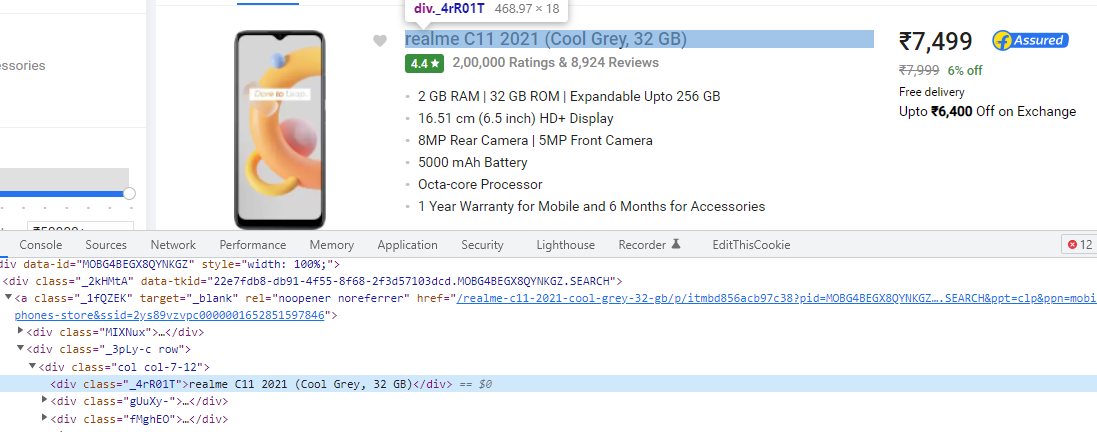

In [10]:
name=soup.find('div',class_="_4rR01T")
print(name)
print(name.text)

<div class="_4rR01T">realme C11 2021 (Cool Grey, 32 GB)</div>
realme C11 2021 (Cool Grey, 32 GB)


In [11]:
price=soup.find('div',class_="_30jeq3 _1_WHN1")
price.text

'₹7,499'

# Create list

In [44]:
name=soup.find_all('div',class_="_4rR01T")
disc=soup.find_all('div',class_="_30jeq3 _1_WHN1")
ori=soup.find_all('div',class_="_3I9_wc _27UcVY")
rat=soup.find_all('div',class_="_3LWZlK")

In [48]:
product=[i.text for i in name]
discounted_price=[i.text for i in disc]
original_price=[i.text for i in ori]
rating=[i.text for i in rat]

In [56]:
print(len(product))
print(len(discounted_price))
print(len(original_price))
print(len(rating))

24
24
24
24


In [57]:
my_data=pd.DataFrame({'product':product,'discounted_price':discounted_price,'original_price':original_price,'rating':rating})

In [58]:
my_data

,product,discounted_price,original_price,rating
0,"realme C11 2021 (Cool Grey, 32 GB)","₹7,499","₹7,999",4.4
1,"realme C11 2021 (Cool Blue, 32 GB)","₹7,499","₹7,999",4.4
2,"realme C11 2021 (Cool Blue, 64 GB)","₹8,999","₹9,999",4.3
3,"realme C11 2021 (Cool Grey, 64 GB)","₹8,999","₹9,999",4.3
4,"realme C31 (Dark Green, 32 GB)","₹9,299","₹10,999",4.4
...,...,...,...,...
19,"realme Narzo 50i (Mint Green, 64 GB)","₹8,999","₹9,999",4.3
20,"realme Narzo 50i (Carbon Black, 64 GB)","₹8,999","₹9,999",4.3
21,"realme C35 (Glowing Black, 64 GB)","₹11,999","₹13,999",4.4
22,"realme 9 (Sunburst Gold, 128 GB)","₹18,999","₹22,999",4.2


# Create Dataframe for multiple pages

In [193]:
url_list=[]
for i in range(0,21):
    url='https://www.flipkart.com/search?sid=tyy%2C4io&otracker=CLP_Filters&p%5B%5D=facets.type%255B%255D%3DSmartphones&sort=recency_desc&page='
    url=url+str(i+1)
    url_list.append(url)

In [194]:
def extract_data_test(url,class_name):
    page=requests.get(url)
    soup=BeautifulSoup(page.text,'html.parser')
    raw_data=soup.find_all('div',class_='_1AtVbE col-12-12')
    lis=[items.find('div',class_=class_name) for items in raw_data]
    new_list=[items.text if str(items)!='None' else '' for items in lis]
    return new_list

In [195]:
product=[]
discounted_price=[]
actual_price=[]
rating=[]
t1= process_time() 
for items in url_list:
    t1_start = process_time() 
    name=extract_data_test(items,"_4rR01T")
    disc=extract_data_test(items,"_30jeq3 _1_WHN1")
    actual=extract_data_test(items,"_3I9_wc _27UcVY")
    rat=extract_data_test(items,"_3LWZlK")
    product=product+name
    discounted_price+=disc
    actual_price+=actual
    rating+=rat
    t1_stop = process_time()
    print(f"url processed and Elapsed time is {(t1_stop-t1_start)} seconds")

url processed and Elapsed time is 0.703125 seconds
url processed and Elapsed time is 0.625 seconds
url processed and Elapsed time is 0.6875 seconds
url processed and Elapsed time is 0.703125 seconds
url processed and Elapsed time is 0.5625 seconds
url processed and Elapsed time is 0.703125 seconds
url processed and Elapsed time is 0.59375 seconds
url processed and Elapsed time is 0.796875 seconds
url processed and Elapsed time is 0.671875 seconds
url processed and Elapsed time is 0.734375 seconds
url processed and Elapsed time is 0.6875 seconds
url processed and Elapsed time is 0.71875 seconds
url processed and Elapsed time is 0.640625 seconds
url processed and Elapsed time is 0.71875 seconds
url processed and Elapsed time is 0.609375 seconds
url processed and Elapsed time is 0.78125 seconds
url processed and Elapsed time is 0.71875 seconds
url processed and Elapsed time is 0.734375 seconds
url processed and Elapsed time is 0.671875 seconds
url processed and Elapsed time is 0.78125 sec

In [196]:
def length(item):
    print(len(item))
length(product)
length(discounted_price)
length(actual_price)
length(rating)

588
588
588
588


In [197]:
my_data=pd.DataFrame({'product':product,'discounted_price':discounted_price,'actual_price':actual_price,'rating':rating})

In [198]:
my_data

,product,discounted_price,actual_price,rating
0,,,,
1,,,,
2,"REDMI 10A (Sea Blue, 64 GB)","₹10,298",,4.7
3,"SAMSUNG Galaxy S21 FE 5G (White, 128 GB)","₹50,990",,3.5
4,"Xiaomi 12 Pro 5G (Noir Black, 256 GB)","₹66,999",,
...,...,...,...,...
583,"REDMI NOTE 10 LITE (Aurora Blue, 64 GB)","₹16,990","₹14,850",4.3
584,"REDMI Note 10 Lite (Glacier White, 128 GB)","₹14,685",,4.3
585,"Nokia C 30 (Green, 64 GB)","₹10,990","₹11,499",3.8
586,,,,


In [199]:
my_data.replace("",np.nan,inplace=True)
my_data.dropna(how='all',inplace=True)
my_data=my_data.reset_index().drop(["index"], axis=1)
my_data

,product,discounted_price,actual_price,rating
0,"REDMI 10A (Sea Blue, 64 GB)","₹10,298",NaN,4.7
1,"SAMSUNG Galaxy S21 FE 5G (White, 128 GB)","₹50,990",NaN,3.5
2,"Xiaomi 12 Pro 5G (Noir Black, 256 GB)","₹66,999",NaN,NaN
3,"Xiaomi 12 Pro 5G (Couture Blue, 256 GB)","₹66,999",NaN,NaN
4,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)","₹15,999","₹22,999",4
...,...,...,...,...
499,"Tecno POVA 2 (Polar Silver, 64 GB)","₹16,990","₹12,990",4.3
500,"Nokia C 30 (Green, 32 GB)","₹14,740","₹9,799",4.3
501,"REDMI NOTE 10 LITE (Aurora Blue, 64 GB)","₹16,990","₹14,850",4.3
502,"REDMI Note 10 Lite (Glacier White, 128 GB)","₹14,685",NaN,4.3


In [201]:
x='gg.xlsx'
my_data.to_excel(x)